# Comparison of SP and 1RSB

In [77]:
using StaticArrays
include("../code/headers.jl")
include("../code/matrix_generator.jl")

valid_degrees (generic function with 2 methods)

In [3]:
# histogram for probability distr
function plotProb(p::AbstractArray, args...; kw...)
   pl = Plots.bar(collect(eachindex(p)), p.parent, args...; kw...) 
end

plotProb (generic function with 1 method)

# 1. At fixed rate

In [3]:
m = factorial(7)*2
R = 0.25
r = 1 - 3R
# r = 0.1
# R = (1-r)/3
n = round(Int, 3m/(2+r))
println("Fraction of degree 3 vars: ", r)
println("Rate ", R)
println("Size ", (m,n))

Fraction of degree 3 vars: 0.25
Rate 0.25
Size (10080, 13440)


In [4]:
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
# convert to edge degree convention to express the degree profile
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
# build graph
H = ldpc_graphGF2(n,m,nedges,lambda,rho).H
x0 = rand((0,1), size(H,2))
s = (-1).^x0
J = 20
init=OffsetArray(MVector{2J+1}(fill(1/(2J+1),2J+1)), -J:J)
y = 0.2
sp = survey_propagation(H; field=copy(s), init, y=y);

Run SP

In [5]:
callback(t, ε, sp) = (println("$t $ε"); false)
iteration!(sp, maxiter=1000, damp=0.1, callback=callback, tol=1e-10)

1 0.10069934949456025
2 0.08660658102131907
3 0.10741567653716211
4 0.10489996635177502
5 0.08217796705914049
6 0.07879610493366829
7 0.08063456379664358
8 0.07969884582080017
9 0.08367069976155217
10 0.0869027635254892
11 0.08930180836890533
12 0.08672317842431077
13 0.0901763194880808
14 0.08888714140611353
15 0.08221188549763836
16 0.08094802629559672
17 0.07623211216784753
18 0.07449592745797134
19 0.06986128075219905
20 0.06386340499810333
21 0.055742264673282416
22 0.054672879204540226
23 0.04941264616347041
24 0.04128912976975596
25 0.0384646266746691
26 0.033608521802130475
27 0.03373390281533378
28 0.033647177501794245
29 0.031852768819288335
30 0.02882743405163335
31 0.0250590483553067
32 0.02271279986797481
33 0.020309022970437518
34 0.018109531575787097
35 0.015824431963184393
36 0.013591380214678317
37 0.012702079384099285
38 0.011582176369748343
39 0.011391350001375922
40 0.010877549573613698
41 0.009781630466445146
42 0.00966634502267194
43 0.009014621671005862
44 0.0079

328 1.831704099508613e-8
329 1.754637335427134e-8
330 1.6808129887913026e-8
331 1.6100947353159256e-8
332 1.5423519128532348e-8
333 1.4774592327349012e-8
334 1.4152968796921073e-8
335 1.3557499012328833e-8
336 1.2987083075621797e-8
337 1.2440666941060385e-8
338 1.191724030569219e-8
339 1.1415836387307365e-8
340 1.0935528704791864e-8
341 1.0475428524614472e-8
342 1.0034687747406679e-8
343 9.612489582089268e-9
344 9.208055318232766e-9
345 8.820637442674695e-9
346 8.449519195430355e-9
347 8.094015790938158e-9
348 7.753469644100619e-9
349 7.427251258462775e-9
350 7.114758449056069e-9
351 6.8154132337738815e-9
352 6.528662832572252e-9
353 6.253977002934619e-9
354 5.990848150894124e-9
355 5.738790553877493e-9
356 5.497337474125175e-9
357 5.266043490159689e-9
358 5.044480833049647e-9
359 4.832240274588173e-9
360 4.628929239913759e-9
361 4.434172695688687e-9
362 4.247609819429954e-9
363 4.06889666404453e-9
364 3.897702716137985e-9
365 3.733711562148301e-9
366 3.5766198891451495e-9
367 3.426137

9.668610356783347e-11

Run population dynamics

In [6]:
popsize=10^6
popP = fill(1/(2J+1), -J:J, 1:popsize)
popQ = fill(1/(2J+1), -J:J, 1:popsize);

In [7]:
ProgressMeter.ijulia_behavior(:clear)
popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y, popP=popP, popQ=popQ)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:53
  err:  0.000694890876732468/5.0e-5


err = 0.000694890876732468


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0… ; ], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 7.194e-321 0.0; 0.0 0.0 … 0.0 0.0… ; ])

Compare

In [8]:
avgP = mean(sp.P)
varP = mean(var(sp.P))
avgPopP = mean(popP, dims=2)[:,1]
varPopP = mean(var(popP, dims=2))
varP, varPopP

(0.004515844045823715, 0.004455984598513121)

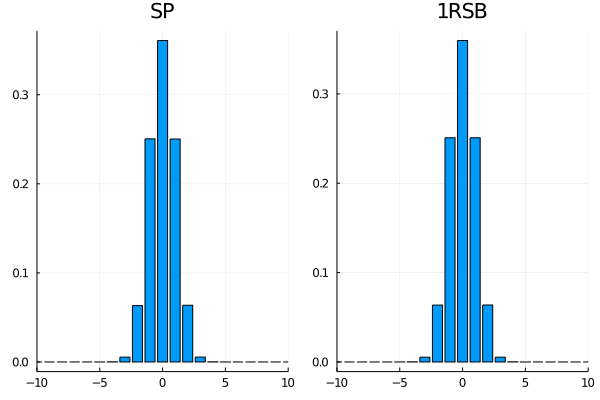

In [9]:
h1 = plotProb(avgP, title="SP", label="", xlim=(-10,10))
h2 = plotProb(avgPopP, title="1RSB", label="", xlim=(-10,10))
Plots.plot(h1,h2)

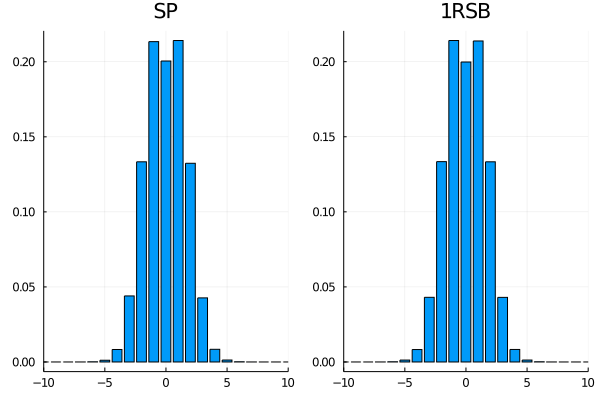

In [10]:
avgQ = mean(sp.Q)
varQ = mean(var(sp.Q))
avgPopQ = mean(popQ, dims=2)[:,1]
varPopQ = mean(var(popQ, dims=2))
varQ, varPopQ
h3 = plotProb(avgQ, title="SP", label="", xlim=(-10,10))
h4 = plotProb(avgPopQ, title="1RSB", label="", xlim=(-10,10))
Plots.plot(h3,h4)

## Overlap

In [11]:
o_sp, f_sp, c_sp = overlap(sp)

(0.5375750575199413, -0.5385985866881083, 0.00020470583363341177)

In [12]:
o_rsb, f_rsb, c_rsb = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:39
  F:  -0.5374926899545567
  O:  0.5364452219304985
  D:  0.23177738903475076


(0.5364452219304985, -0.5374926899545567, 0.00020949360481163916)

# 2. Varying rate

In [57]:
f3 = 0.4
f1 = 0.05
Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
mK = sum(k*K[k] for k=eachindex(K))
mΛ = sum(d*Λ[d] for d=eachindex(Λ))
@show α = mΛ/mK
R=1-α

α = mΛ / mK = 0.7833333333333333


0.21666666666666667

In [126]:
using Unzip
ProgressMeter.ijulia_behavior(:clear)
y = 0.5
J = 20

function initpop(J, popsize)
    p = fill(0.0, -J:J, 1:popsize)
    p[-1:1,:] .= 1/3
    p
end

popsize=10^5
n = 100*3*7*2

f3s = 0.4:0.01:0.6
f1s = [0.00, 0.01, 0.05]
f1s = [0.00]
Rs=fill(NaN, eachindex(f1s), eachindex(f3s))
D_sp=fill(NaN, eachindex(f1s), eachindex(f3s))
# D_rsb=fill(NaN, eachindex(f3s))

for (j,f1) in pairs(f1s)
    println("#### degree $j of $(length(f1s)): f1 = $f1 ---")
    popP = initpop(J, popsize)
    popQ = initpop(J, popsize)
    for (i,f3) in pairs(f3s)
        println("--- degree $i of $(length(f3s)): f3 = $f3 ---")
        flush(stdout)
        Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
        K = OffsetVector([0,0,0,1], 0:3)
        mK = sum(k*K[k] for k=eachindex(K))
        mΛ = sum(d*Λ[d] for d=eachindex(Λ))
        α = mΛ/mK
        R=1-α
        # Single instance
        nedges = Int(round(n*sum(i*l for (i,l) in pairs(Λ)), digits=8))
        m = Int(nedges/3)
        H = sparse(ldpc_matrix(n, m, nedges, Λ, K)')
        s = rand((-1,1), size(H,2))
        init = OffsetArray(MVector{2J+1}(fill(0.0,2J+1)), -J:J)
#         init[-1:1] .= 1/3
        sp = survey_propagation(H; field=s, init, y=y)
        iteration!(sp, maxiter=1000, damp=0.5, tol=1e-6)
        O = overlap(sp)[1]
        D_sp[j,i] = (1-O)/2
        # 1RSB
#         popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y, popP=popP, popQ=popQ)
#         O,_,_ = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)
#         D_rsb[i] = (1-O)/2
        Rs[j,i] = R
    end
end

#### degree 1 of 1: f1 = 0.0 ---
--- degree 1 of 21: f3 = 0.4 ---
--- degree 2 of 21: f3 = 0.41 ---
--- degree 3 of 21: f3 = 0.42 ---
--- degree 4 of 21: f3 = 0.43 ---
--- degree 5 of 21: f3 = 0.44 ---
--- degree 6 of 21: f3 = 0.45 ---
--- degree 7 of 21: f3 = 0.46 ---
--- degree 8 of 21: f3 = 0.47 ---
--- degree 9 of 21: f3 = 0.48 ---
--- degree 10 of 21: f3 = 0.49 ---
--- degree 11 of 21: f3 = 0.5 ---
--- degree 12 of 21: f3 = 0.51 ---
--- degree 13 of 21: f3 = 0.52 ---
--- degree 14 of 21: f3 = 0.53 ---
--- degree 15 of 21: f3 = 0.54 ---
--- degree 16 of 21: f3 = 0.55 ---
--- degree 17 of 21: f3 = 0.56 ---
--- degree 18 of 21: f3 = 0.57 ---
--- degree 19 of 21: f3 = 0.58 ---
--- degree 20 of 21: f3 = 0.59 ---
--- degree 21 of 21: f3 = 0.6 ---


In [89]:
using JLD
data = load("RSB_y0p5.jld")

Dict{String,Any} with 6 entries:
  "R_f10p0"     => [0.2, 0.196667, 0.193333, 0.19, 0.186667, 0.183333, 0.18, 0.…
  "Dist_f10p05" => [0.248409, 0.250856, 0.25318, 0.254077, 0.256661, 0.259715, …
  "R_f10p05"    => [0.216667, 0.213333, 0.21, 0.206667, 0.203333, 0.2, 0.196667…
  "Dist_f10p01" => [0.254784, 0.256679, 0.258544, 0.261264, 0.263609, 0.26791, …
  "Dist_f10p0"  => [0.255626, 0.258443, 0.260392, 0.262498, 0.265719, 0.271311,…
  "R_f10p01"    => [0.203333, 0.2, 0.196667, 0.193333, 0.19, 0.186667, 0.183333…

In [94]:
data["R_f10p0"]
data["Dist_f10p0"]

21-element Array{Float64,1}:
 0.25562593297202035
 0.25844310051083064
 0.26039198172758843
 0.2624977524450761
 0.2657189186051347
 0.2713108952600046
 0.279375636332854
 0.2971253706926769
 0.30021520972115484
 0.30075612681190356
 0.3002738370924648
 0.30184832117633453
 0.30426221973544043
 0.3028489709219587
 0.3049509659152435
 0.30413321828507905
 0.3024649408873828
 0.3014355226509112
 0.301821370051634
 0.3015788143446322
 0.3047780387847938

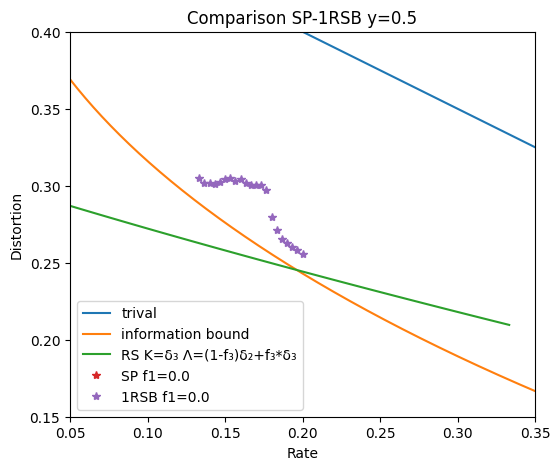

PyObject <matplotlib.legend.Legend object at 0x7f813d85d358>

In [127]:
using PyPlot
HH(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(6,5))
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(HH.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(R_f3, D_f3, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃")
PyPlot.plot(Rs[1,:],D_sp[1,:], "*", label="SP f1=0.0")
PyPlot.plot(data["R_f10p0"], data["Dist_f10p0"], "*", label="1RSB f1=0.0")
# PyPlot.plot(Rs[2,:],D_sp[2,:], "+", label="SP f1=0.01")
# PyPlot.plot(data["R_f10p01"], data["Dist_f10p01"], "+", label="1RSB f1=0.01")
# PyPlot.plot(Rs[3,:],D_sp[3,:], "^", label="SP f1=0.05")
# PyPlot.plot(data["R_f10p05"], data["Dist_f10p05"], "^", label="1RSB f1=0.05")
PyPlot.xlim((0.05,0.35))
PyPlot.ylim((0.15,0.4))
PyPlot.title("Comparison SP-1RSB y=0.5")
legend()

In [121]:
n = 100*3*7*2
R_f3 = [0.33333333333333337,0.33000000000000007,0.32666666666666666,0.32333333333333336,0.31999999999999995,0.31666666666666676,0.31333333333333335,0.31000000000000005,0.30666666666666664,0.30333333333333334,0.29999999999999993,0.29666666666666675,0.29333333333333333,0.29000000000000004,0.2866666666666666,0.2833333333333333,0.2799999999999999,0.2766666666666667,0.2733333333333333,0.2699999999999999,0.2666666666666666,0.2633333333333333,0.2599999999999999,0.2566666666666667,0.2533333333333333,0.25,0.2466666666666667,0.2433333333333333,0.23999999999999988,0.2366666666666667,0.2333333333333334,0.2300000000000001,0.22666666666666668,0.22333333333333327,0.22000000000000008,0.21666666666666679,0.21333333333333326,0.20999999999999996,0.20666666666666667,0.20333333333333348,0.19999999999999984,0.19666666666666666,0.19333333333333336,0.18999999999999995,0.18666666666666654,0.18333333333333324,0.18000000000000005,0.17666666666666675,0.17333333333333334,0.16999999999999993,0.16666666666666663,0.16333333333333344,0.16000000000000003,0.15666666666666662,0.15333333333333332,0.15000000000000002,0.1466666666666666,0.1433333333333332,0.14,0.13666666666666671,0.13333333333333341,0.1299999999999999,0.1266666666666666,0.1233333333333334,0.1200000000000001,0.11666666666666659,0.11333333333333329,0.10999999999999999,0.1066666666666668,0.10333333333333339,0.10000000000000009,0.09666666666666668,0.09333333333333327,0.08999999999999997,0.08666666666666678,0.08333333333333337,0.07999999999999996,0.07666666666666666,0.07333333333333336,0.06999999999999995,0.06666666666666654,0.06333333333333335,0.05999999999999994,0.05666666666666664,0.053333333333333344,0.050000000000000155,0.04666666666666652,0.043333333333333335,0.040000000000000036,0.036666666666666736,0.033333333333333215,0.029999999999999916,0.026666666666666727,0.023333333333333428,0.020000000000000018,0.01666666666666672,0.013333333333333308,0.009999999999999898,0.00666666666666671,0.0033333333333334103,0.0]
D_f3 = [0.20962056095628745,0.21045655312219785,0.21129398045076497,0.21213285191160997,0.21297317651789593,0.213814963331392,0.21465822146743357,0.21550296009981335,0.21634918846557782,0.2171969158697719,0.21804615169011754,0.2188969053816388,0.21974918648125297,0.22060300461230448,0.22145836948909192,0.22231529092135494,0.22317377881874867,0.22403384319531316,0.22489549417392346,0.22575874199075563,0.2266235969997512,0.22749006967709307,0.22835817062570685,0.22922791057977476,0.23009930040929016,0.23097235112463632,0.23184707388120812,0.23272347998408488,0.2336015808927387,0.23448138822581466,0.2353629137659588,0.23624616946472055,0.23713116744752138,0.23801792001870203,0.23890643966665281,0.2397967390690277,0.2406888310980555,0.24158272882594994,0.24247844553042286,0.2433759947003037,0.24427539004128584,0.24517664548178786,0.2460797751789402,0.24698479352472213,0.2478917151522217,0.248800554942059,0.2497113280289589,0.2506240498084894,0.2515387359439647,0.2524554023735355,0.25337406531746137,0.25429474128557106,0.25521744708493777,0.2561421998277597,0.2570690169394544,0.25799791616700474,0.2589289155875188,0.2598620336170625,0.26079728901973587,0.2617347009170402,0.26267428879751364,0.26361607252667024,0.2645600723572469,0.26550630893977045,0.2664548033334655,0.26740557701750556,0.26835865190263664,0.2693140503431725,0.2702717951493969,0.271231909600374,0.2721944174571924,0.27315934297666117,0.27412671092547497,0.2750965465948728,0.2760688758158149,0.2770437249746786,0.2780211210295341,0.27900109152699526,0.2799836646196798,0.28096886908431673,0.28195673434051494,0.28294729047022854,0.283940568237963,0.2849365991117401,0.2859354152848619,0.28693704969851397,0.28794153606524925,0.2889489088934002,0.28995920351242044,0.290972456099293,0.2919887037059378,0.2930079842877797,0.29403033673345685,0.2950558008957639,0.2960844176238681,0.29711622879689686,0.298151277358935,0.2991896073555008,0.30023126397162553,0.30127629357155217,0.30232474374018364]; 

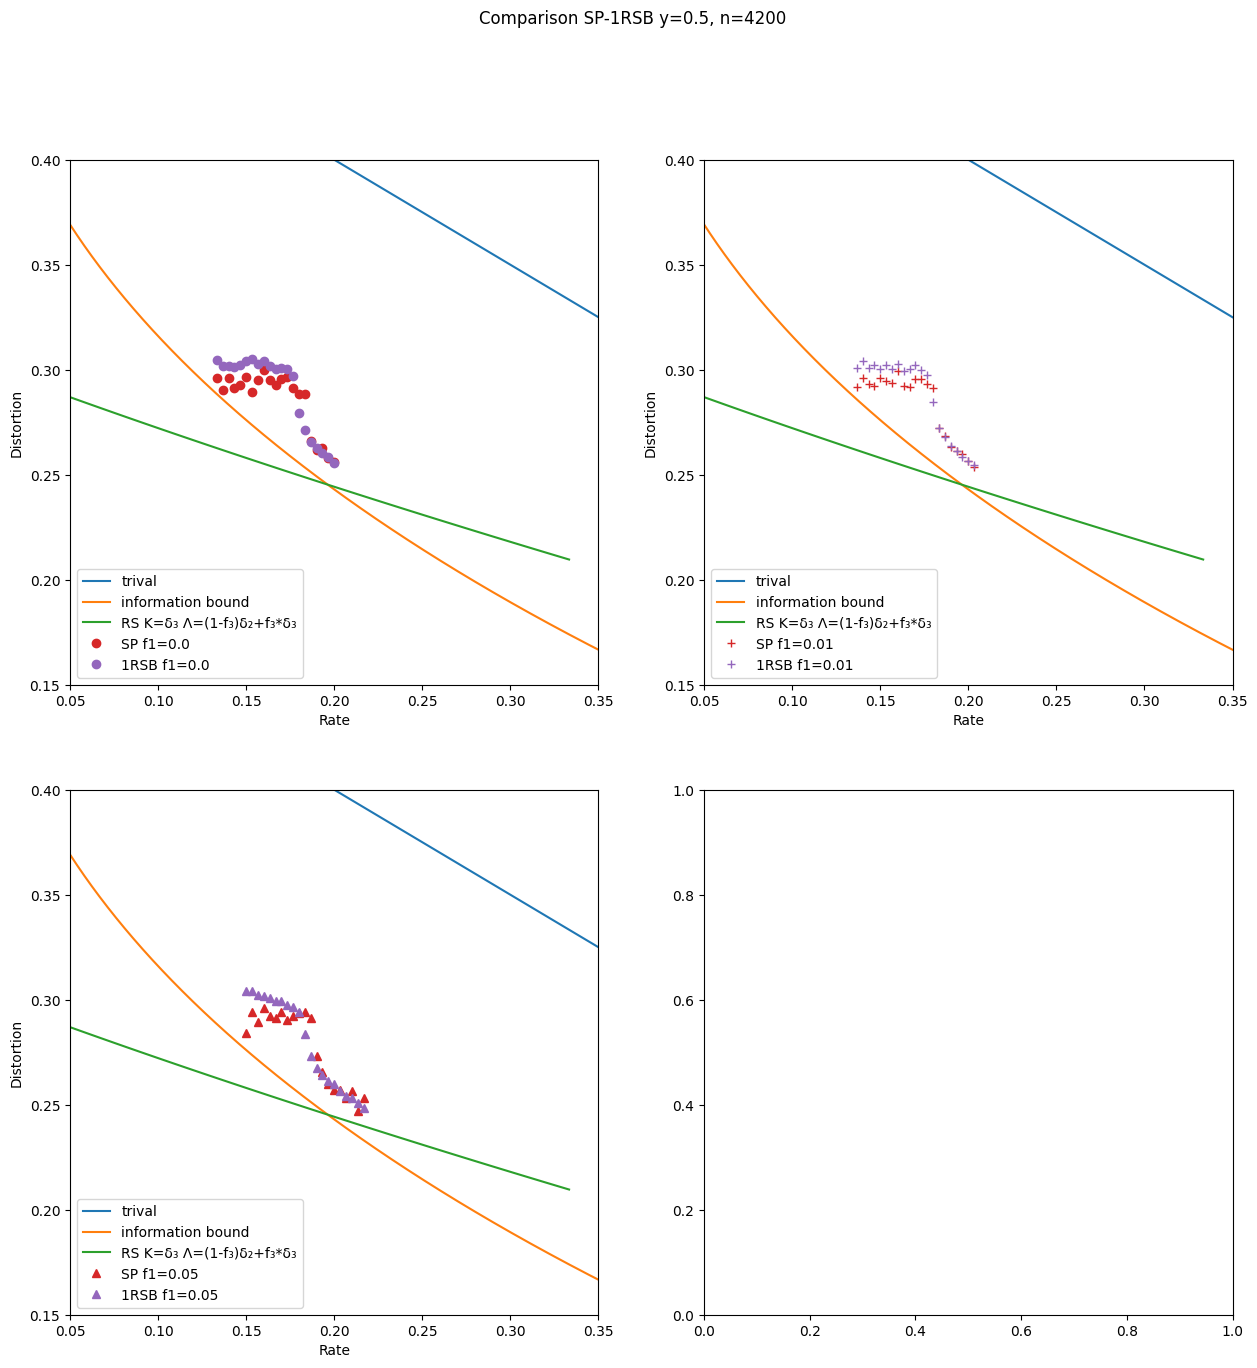

In [124]:
using PyPlot
HH(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(2,2,figsize=(15,15))
PyPlot.suptitle("Comparison SP-1RSB y=0.5, n=$n")

PyPlot.subplot(2,2,1)
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(HH.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(R_f3, D_f3, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃")
PyPlot.plot(Rs[1,:],D_sp[1,:], "o", label="SP f1=0.0")
PyPlot.plot(data["R_f10p0"], data["Dist_f10p0"], "o", label="1RSB f1=0.0")
PyPlot.xlim((0.05,0.35))
PyPlot.ylim((0.15,0.4))
legend()

PyPlot.subplot(2,2,2)
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(HH.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(R_f3, D_f3, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃")
PyPlot.plot(Rs[2,:],D_sp[2,:], "+", label="SP f1=0.01")
PyPlot.plot(data["R_f10p01"], data["Dist_f10p01"], "+", label="1RSB f1=0.01")
PyPlot.xlim((0.05,0.35))
PyPlot.ylim((0.15,0.4))
legend()

PyPlot.subplot(2,2,3)
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(HH.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(R_f3, D_f3, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃")
PyPlot.plot(Rs[3,:],D_sp[3,:], "^", label="SP f1=0.05")
PyPlot.plot(data["R_f10p05"], data["Dist_f10p05"], "^", label="1RSB f1=0.05")
PyPlot.xlim((0.05,0.35))
PyPlot.ylim((0.15,0.4))
legend()
PyPlot.savefig("sp_1rsb.png")

In [123]:
?PyPlot.savefig


        Save the current figure.

        Call signature::

          savefig(fname, dpi=None, facecolor='w', edgecolor='w',
                  orientation='portrait', papertype=None, format=None,
                  transparent=False, bbox_inches=None, pad_inches=0.1,
                  frameon=None, metadata=None)

        The output formats available depend on the backend being used.

        Parameters
        ----------
        fname : str or PathLike or file-like object
            A path, or a Python file-like object, or
            possibly some backend-dependent object such as
            `matplotlib.backends.backend_pdf.PdfPages`.

            If *format* is not set, then the output format is inferred from
            the extension of *fname*, if any, and from :rc:`savefig.format`
            otherwise.  If *format* is set, it determines the output format.

            Hence, if *fname* is not a path or has no extension, remember to
            specify *format* to ensure that th